In [1]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"C:\Users\ADELINE CHRISTABEL\Desktop\Crop_recommendation.csv")
#data

In [3]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
data.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [5]:
#data.size

In [6]:
data.sample(10)

,N,P,K,temperature,humidity,ph,rainfall,label
303,40,64,16,16.433403,24.240459,5.926677,140.371781,kidneybeans
1961,107,43,18,22.426733,81.534808,6.745104,65.544758,cotton
741,49,76,18,27.053652,67.701753,7.393632,60.469383,blackgram
972,18,21,35,23.280123,94.943305,6.368561,111.138210,pomegranate
623,31,37,21,27.239250,86.404241,6.713411,37.312369,mungbean
2110,84,36,28,26.735062,55.551648,6.119892,140.630521,coffee
400,3,72,24,36.512684,57.928872,6.031608,122.653969,pigeonpeas
1503,8,120,201,21.186674,91.134357,6.321152,122.233323,apple
1213,16,139,203,17.828037,80.960934,6.275641,65.847488,grapes
79,81,41,38,22.678461,83.728744,7.524080,200.913316,rice


In [13]:
#data.shape

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [17]:
data.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [19]:
data = data.dropna()

In [21]:
data = data.drop_duplicates()

In [23]:
#data.shape

In [25]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


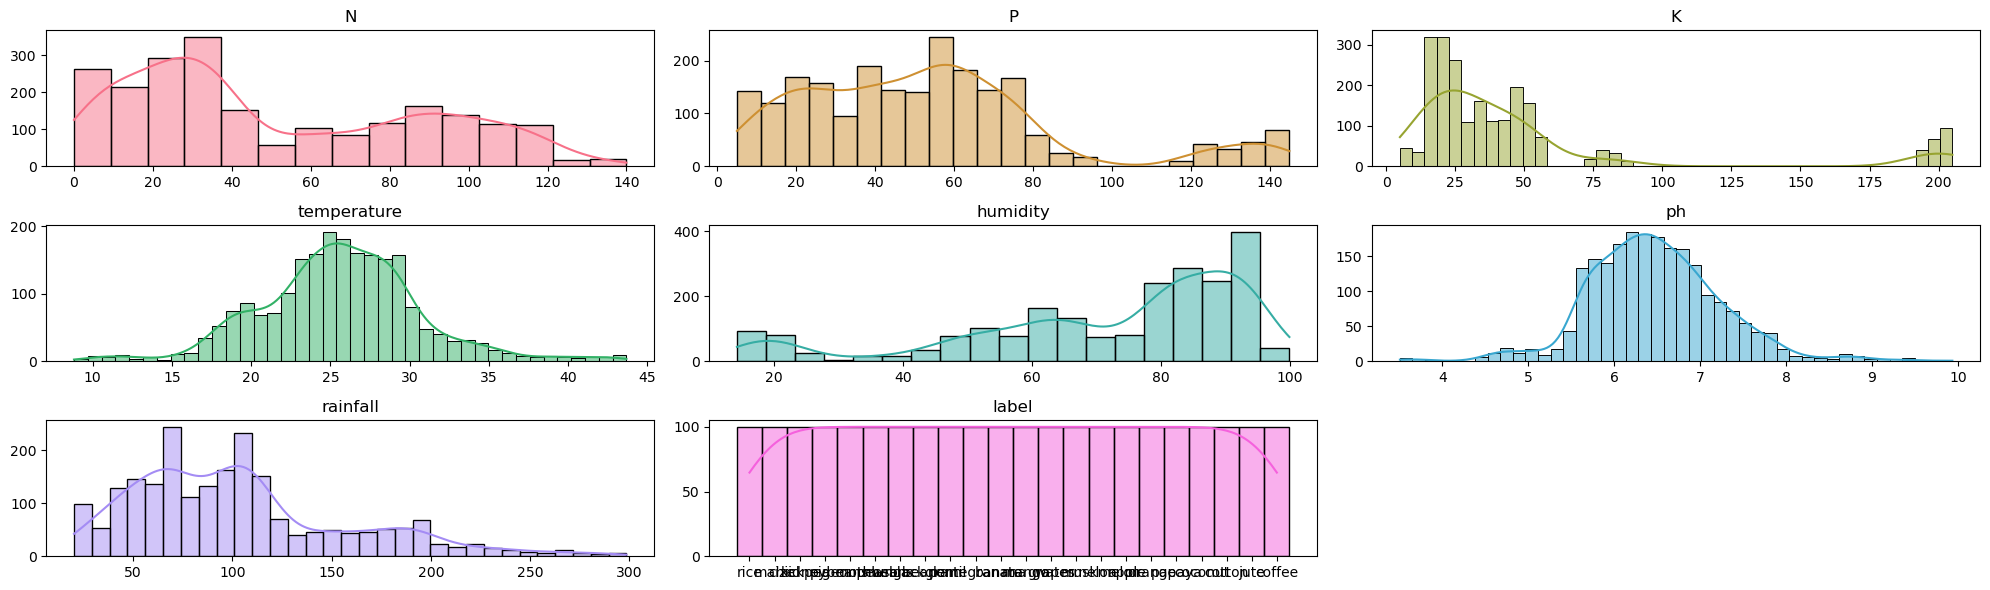

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is a pandas DataFrame
columns = ["N", "P", "K", "temperature", "humidity", "ph", "rainfall", "label"]

# Define a list of unique colors (length should match or exceed the number of columns)
colors = sns.color_palette("husl", len(columns))  # 'husl' generates visually distinct colors

# Adjust number of rows and columns for subplots based on the number of columns
n_cols = 3  # Number of columns in subplot grid
n_rows = len(columns) // n_cols + (1 if len(columns) % n_cols != 0 else 0)

# Create subplots grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6))
axes = axes.flatten()

# Plot each column in the grid
for i, column in enumerate(columns):
    sns.histplot(data[column], kde=True, ax=axes[i], color=colors[i])
    axes[i].set_title(column)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Remove any empty subplots if any
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


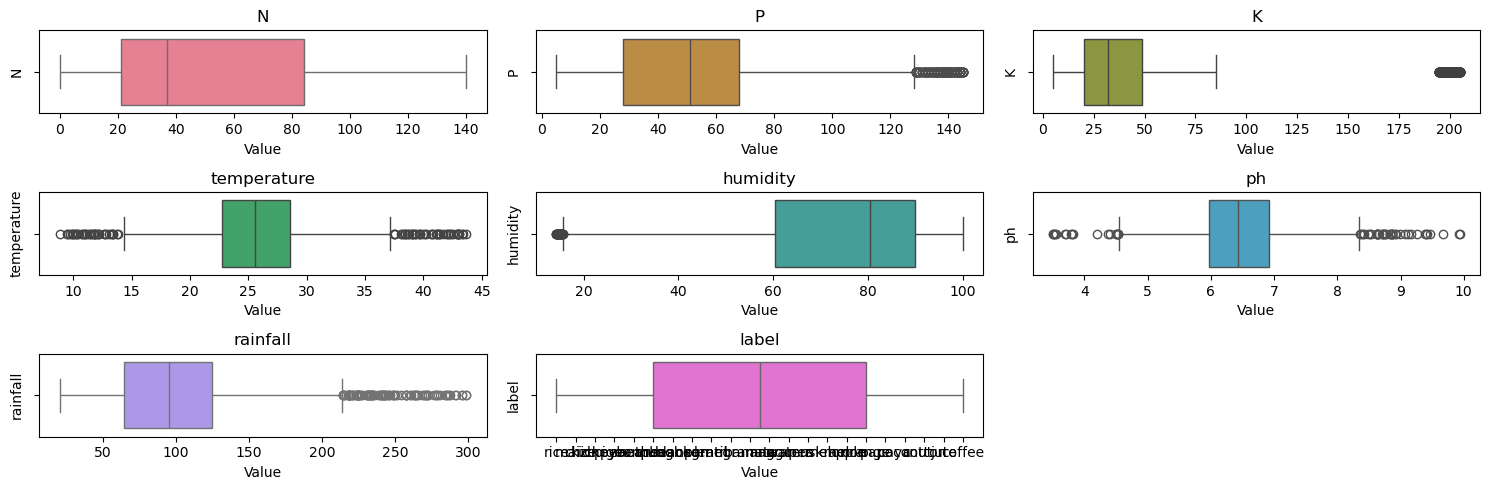

In [28]:

# Define a list of unique colors (length should match or exceed the number of columns)
colors = sns.color_palette("husl", len(columns))  # 'husl' generates visually distinct colors

# Adjust number of rows and columns for subplots based on the number of columns
n_cols = 3  # Number of columns in subplot grid
n_rows = len(columns) // n_cols + (1 if len(columns) % n_cols != 0 else 0)

# Create subplots grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5))
axes = axes.flatten()

# Plot each column in the grid
for i, column in enumerate(columns):
    sns.boxplot(data=data, x=column, ax=axes[i], color=colors[i])  # Set `x=column` for horizontal box plots
    axes[i].set_title(column)
    axes[i].set_xlabel("Value")  # Generic x-axis label for all plots
    axes[i].set_ylabel(column)  # Show the column name on the y-axis

# Remove any empty subplots if any
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


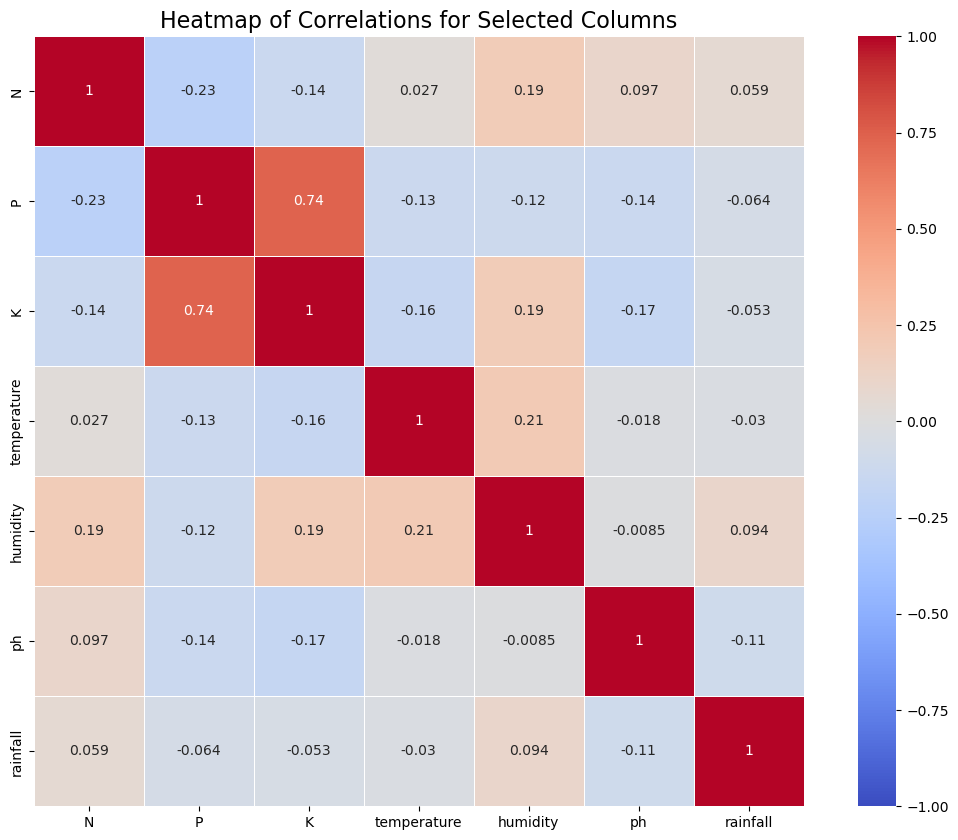

In [29]:
# Filter only numeric columns from the data
numeric_data = data[columns].select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_data = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=0.5)
plt.title('Heatmap of Correlations for Selected Columns', fontsize=16)
plt.show()


In [30]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Select numerical columns (all columns except 'label')
numerical_columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Apply StandardScaler to the numerical columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Show the scaled data
print(data.head())


          N         P         K  temperature  humidity        ph  rainfall  \
0  1.068797 -0.344551 -0.101688    -0.935587  0.472666  0.043302  1.810361   
1  0.933329  0.140616 -0.141185    -0.759646  0.397051  0.734873  2.242058   
2  0.255986  0.049647 -0.081939    -0.515898  0.486954  1.771510  2.921066   
3  0.635298 -0.556811 -0.160933     0.172807  0.389805  0.660308  2.537048   
4  0.743673 -0.344551 -0.121436    -1.083647  0.454792  1.497868  2.898373   

  label  
0  rice  
1  rice  
2  rice  
3  rice  
4  rice  


In [31]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le_label = LabelEncoder()

# Apply Label Encoding to the 'label' column (since it's categorical)
data['label'] = le_label.fit_transform(data['label'])

# Show the encoded data
print(data.head())


          N         P         K  temperature  humidity        ph  rainfall  \
0  1.068797 -0.344551 -0.101688    -0.935587  0.472666  0.043302  1.810361   
1  0.933329  0.140616 -0.141185    -0.759646  0.397051  0.734873  2.242058   
2  0.255986  0.049647 -0.081939    -0.515898  0.486954  1.771510  2.921066   
3  0.635298 -0.556811 -0.160933     0.172807  0.389805  0.660308  2.537048   
4  0.743673 -0.344551 -0.121436    -1.083647  0.454792  1.497868  2.898373   

   label  
0     20  
1     20  
2     20  
3     20  
4     20  


In [33]:
from sklearn.model_selection import train_test_split

# Define features and target
X = data.drop(columns=['label'])  # Drop non-relevant columns
y = data['label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1760, 7) (440, 7) (1760,) (440,)


In [34]:
# Save the dataset to a CSV file without the index
data.to_csv('CropRecommendationTesting.csv', index=None)


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor



models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Machine": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    
}

In [37]:
results = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({"Model": model_name, "MSE": mse, "R2": r2})

results_df = pd.DataFrame(results).sort_values(by="R2", ascending=False)
print(results_df)

                    Model        MSE        R2
1           Decision Tree   1.888636  0.955377
5     K-Nearest Neighbors   2.381727  0.943726
2           Random Forest   2.400190  0.943290
3       Gradient Boosting   4.012667  0.905192
4  Support Vector Machine   7.982001  0.811407
0       Linear Regression  31.474263  0.256348


In [44]:
# Step 6: Select the best model
best_model_name = results_df.iloc[0]["Model"]
print(f"Best model: {best_model_name}")

best_model = models[best_model_name]
best_model.fit(X_train, y_train)

Best model: Decision Tree


DecisionTreeRegressor(random_state=42)

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate the models (example for one model)
y_pred = best_model.predict(X_test)  # Replace `best_model` with your model variable
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 1.8886
Root Mean Squared Error: 1.3743
Mean Absolute Error: 0.1750
R² Score: 0.9554


In [46]:
import joblib

model_filename = f"{best_model_name}_CropRecommend_model.pkl"
joblib.dump(best_model, model_filename)
joblib.dump(le_label, 'label_encoder.pkl')
print(f"Model saved successfully as {model_filename}")

Model saved successfully as Decision Tree_CropRecommend_model.pkl


In [47]:
import streamlit as st
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder

# Load the model
model_filename = 'Decision Tree_CropRecommend_model.pkl'  # Match the saved model filename
loaded_model = joblib.load(model_filename)

# Load the label encoder (make sure it's saved separately)
le_label = joblib.load('label_encoder.pkl')  # Assuming you saved the label encoder

# Title of the app
st.title("Crop Recommendation")

# Upload CSV file
uploaded_file = st.file_uploader("Upload your CSV file for input data", type=["csv"])

if uploaded_file:
    try:
        # Read the uploaded file
        data = pd.read_csv(uploaded_file)
        st.write("Uploaded Data:")
        st.dataframe(data)

        # Ensure the uploaded file has the correct columns
        required_columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
        if not all(col in data.columns for col in required_columns):
            st.error("Uploaded file does not contain the necessary columns!")
        else:
            # Dropdown to select a row
            selected_index = st.selectbox("Select a row for prediction:", data.index)

            # Pre-fill inputs based on the selected row or manual entry
            input_data = {}
            for col in required_columns:
                if selected_index is not None:
                    input_data[col] = st.number_input(f"{col}:", 
                                                      value=float(data.loc[selected_index, col]), 
                                                      step=0.00001,
                                                      format="%.5f", 
                                                      key=col)
                else:
                    input_data[col] = st.number_input(f"{col}:", value=0.0, step=0.00001, format="%.5f", key=col)

            # Convert input data to DataFrame for prediction
            input_df = pd.DataFrame([input_data])

            # Predict button
            if st.button("Predict"):
                prediction = loaded_model.predict(input_df)
                # Decode the numerical prediction back to the categorical label
                predicted_crop = le_label.inverse_transform([int(prediction[0])])[0]
                st.write(f"Recommended Crop: {predicted_crop}")

    except Exception as e:
        st.error(f"Error processing the file: {e}")
else:
    st.write("Please upload a CSV file or manually enter data for prediction.")


2025-01-18 22:13:19.006 
  command:

    streamlit run C:\Users\ADELINE CHRISTABEL\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
